Prerequisites
--------
------------


Registration number: 191910

Alpha = 1 + mod(910,3)

Alpha = 3

In [11]:
!pip install control

     |████████████████████████████████| 339 kB 7.6 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=e372dc485b9a1c2d2e1b26b1b6894f7515ab0f955379ed63073f065ba57dfdbe
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [12]:
# Import Statements
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd
import base64
from google.colab import output
import control

In [3]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%3)
display(Latex(r'\alpha : ' + str(alpha)))

<IPython.core.display.Latex object>

In [20]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

In [14]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount("/content/drive")
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/DSP LAB/Experiment 6'
/content/drive/My Drive/DSP LAB/Experiment 6


Problem  #1
-----
-----

Question 1
---------------

In [15]:
Fs=720

T=1/Fs

Wp = 10*2*np.pi
Ws = 20*2*np.pi 

pass_ripple = alpha
stop_ripple = 40

wp = (2/T) * np.tan(Wp/(Fs*2))
ws = (2/T) * np.tan(Ws/(Fs*2))

N, wc=sp.buttord(wp, ws, pass_ripple, stop_ripple, analog=True)

print('Order filter:'.format(N))
print('Cutoff frequency (rad/sec): '.format(wc))

b, a = sp.butter(N, wc, btype='low', analog=True, output='ba')

bd, ad=sp.bilinear(b, a, fs=Fs)

print(control.TransferFunction(b, a, dt=True))

Order filter:
Cutoff frequency (rad/sec): 

                                                       3.192e+14
------------------------------------------------------------------------------------------------------------------------
z^8 + 333.3 z^7 + 5.553e+04 z^6 + 6.004e+06 z^5 + 4.59e+08 z^4 + 2.538e+10 z^3 + 9.922e+11 z^2 + 2.517e+13 z + 3.192e+14



Question 2
---------------

In [37]:
plt.rcParams.update({
    "figure.figsize": (15,15),
    "font.size": 12})

<Figure size 1080x1080 with 0 Axes>

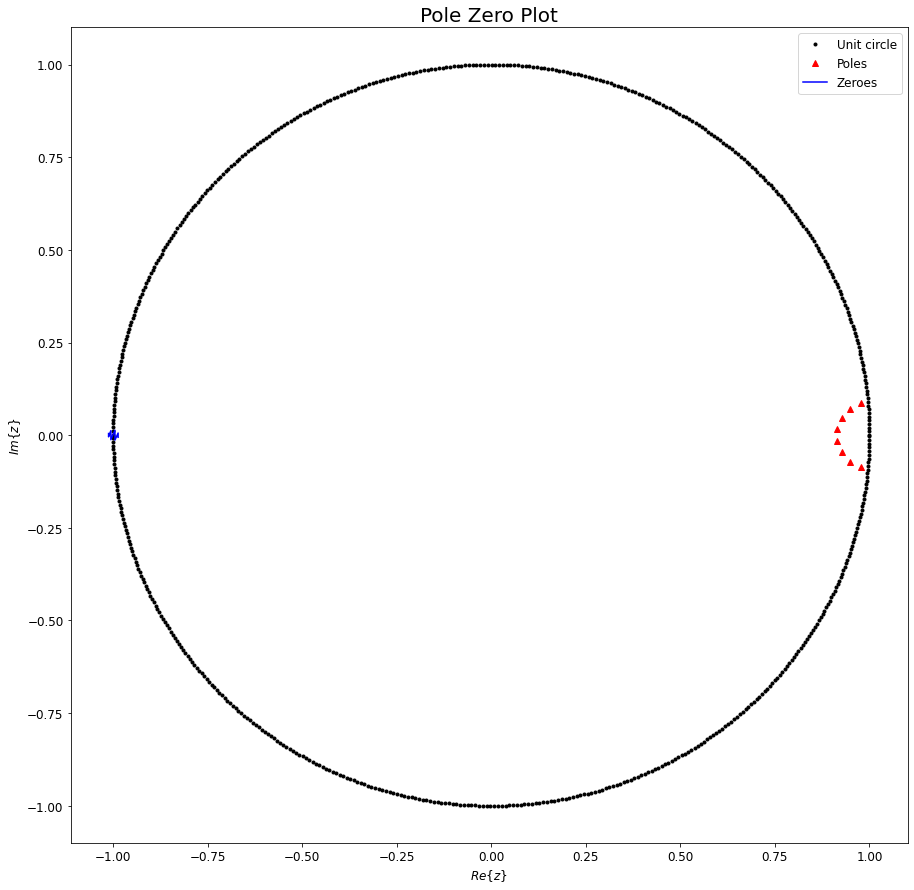

<Figure size 1080x1080 with 0 Axes>

In [38]:

zeroes, poles, _ = sp.tf2zpk(bd, ad)

cir = np.arange(0, 2*np.pi, 0.01)

plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit circle')
plt.plot(np.real(poles), np.imag(poles), 'r^', label='Poles')
plt.plot(np.real(zeroes), np.imag(zeroes), 'b-', label='Zeroes')
plt.legend()
plt.title(r'Pole Zero Plot',fontsize = 20)

plt.xlabel(r'$Re\{z\}$')
plt.ylabel(r'$Im\{z\}$')
#plt.savefig('q1p1.png')
plt.figure()

Question 3
---------------

In [39]:
freqs, H = sp.freqz(bd, ad, 1024)
def bode_plot(xlab,ylab,name,X,Y):
  plt.semilogx(X,Y)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title(name,fontsize = 20)
  plt.grid(True, which='both')
  plt.figure()


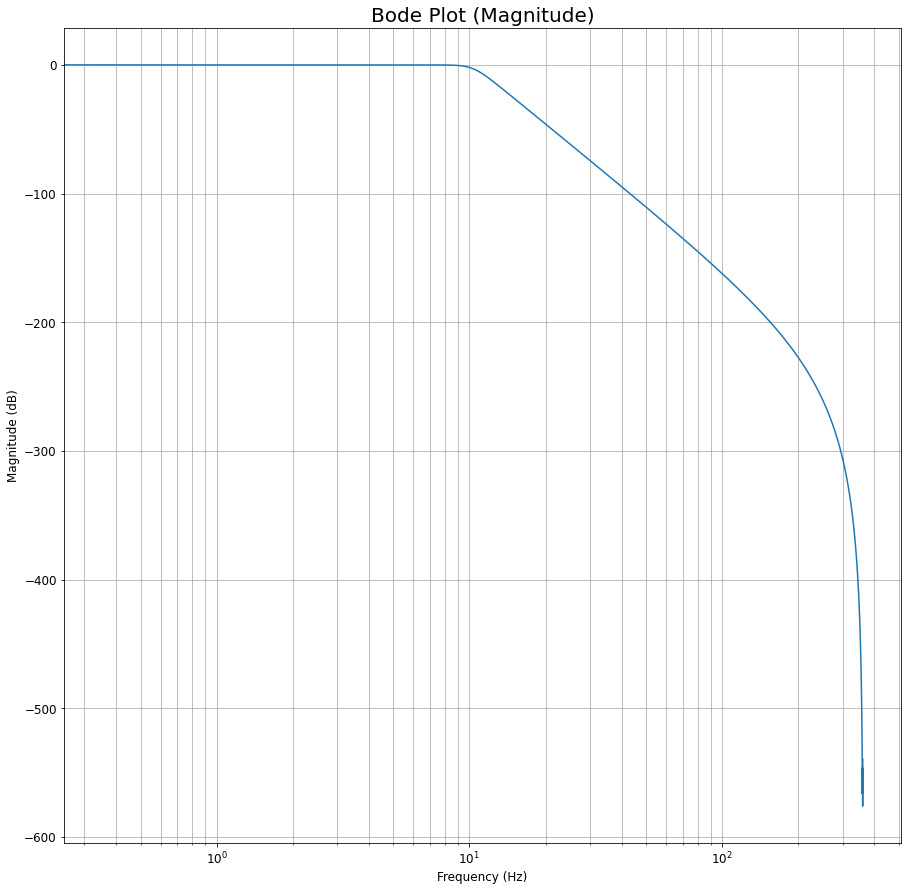

<Figure size 1080x1080 with 0 Axes>

In [40]:
bode_plot('Frequency (Hz)','Magnitude (dB)','Bode Plot (Magnitude)' ,freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(H)))

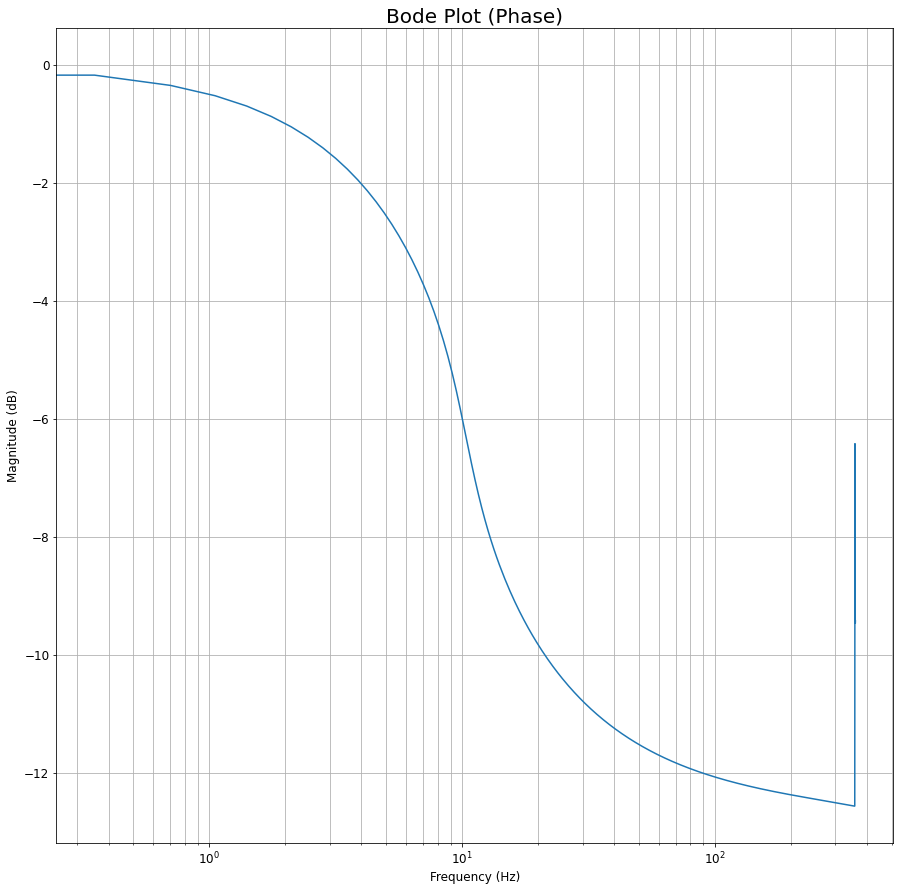

<Figure size 1080x1080 with 0 Axes>

In [41]:
bode_plot('Frequency (Hz)','Magnitude (dB)','Bode Plot (Phase)',freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(H)))

In [42]:
def filter(xlab,ylab,name,bd,ad,res,t):
  fn = sp.lfilter(bd, ad, res)
  plt.plot(t,fn)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title(name,fontsize = 20)
  plt.figure()
  return fn

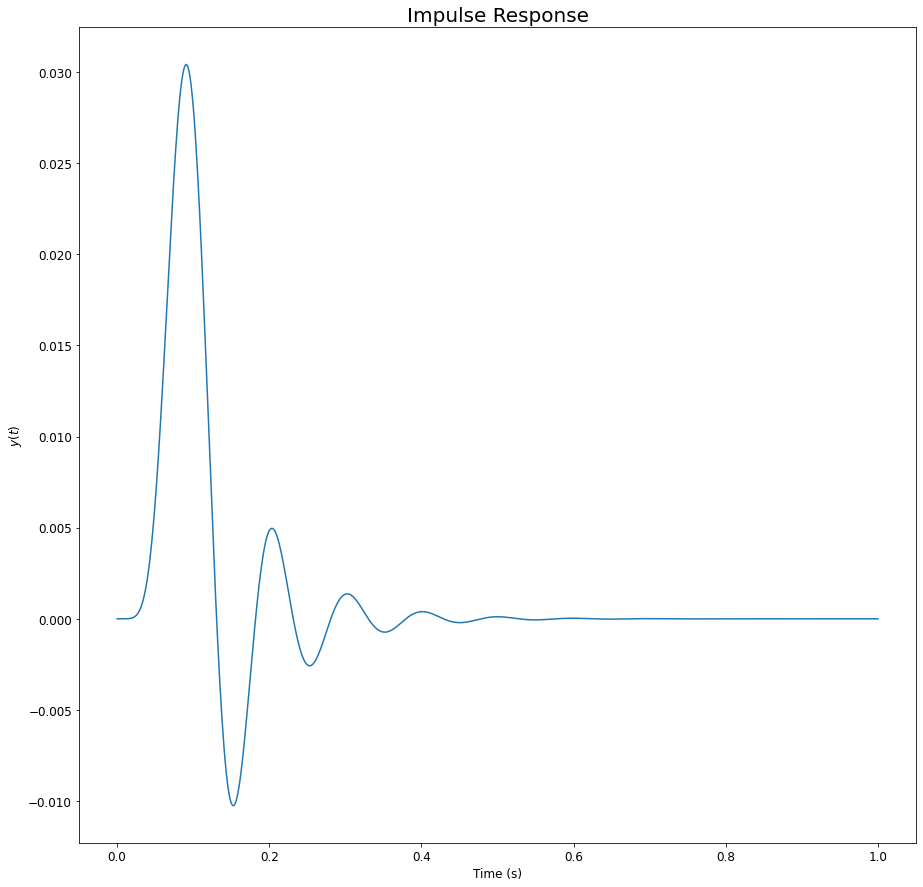

<Figure size 1080x1080 with 0 Axes>

In [43]:
t =np.linspace(0, 1, Fs)
# print(len(t))
delta=np.hstack((np.array([1]), np.zeros((Fs-1))))
yf_i = filter('Time (s)', r'$y(t)$','Impulse Response',bd, ad, delta,t)

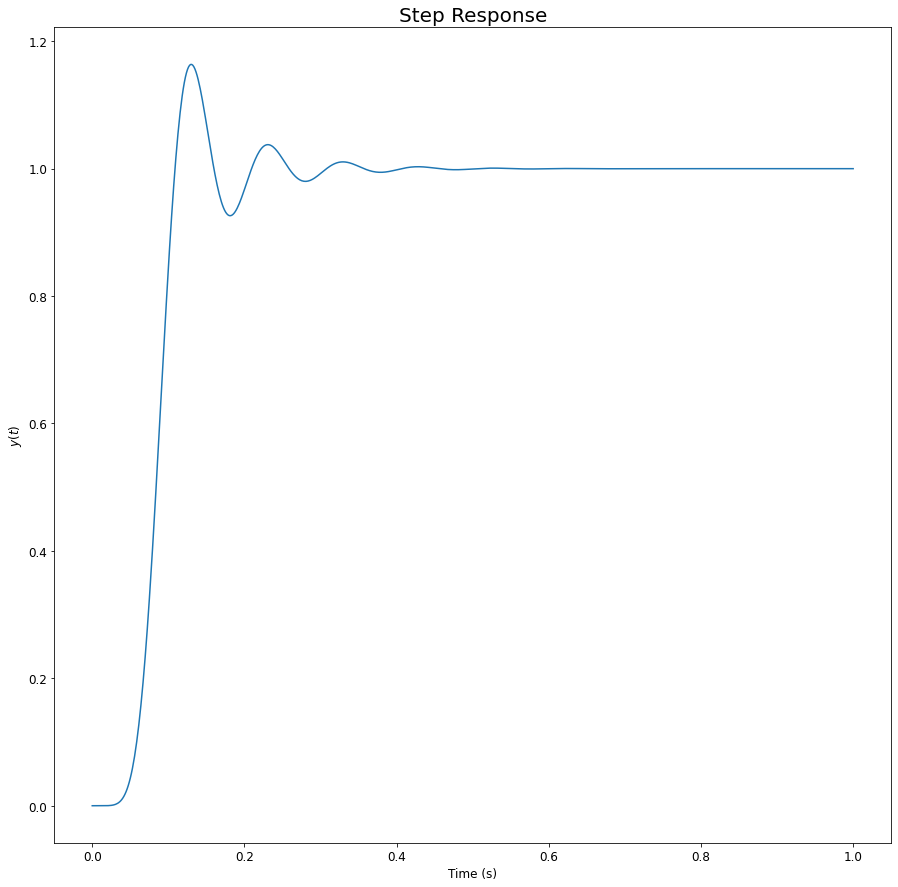

<Figure size 1080x1080 with 0 Axes>

In [44]:
unit=np.ones((Fs))
yf_s = filter('Time (s)', r'$y(t)$','Step Response',bd, ad, unit,t)

Problem #2 
-------------------
----------------------

In [46]:
def plot_sig(sig,name,xlab,ylab):
  plt.plot(signal)
  plt.title(name)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.figure()

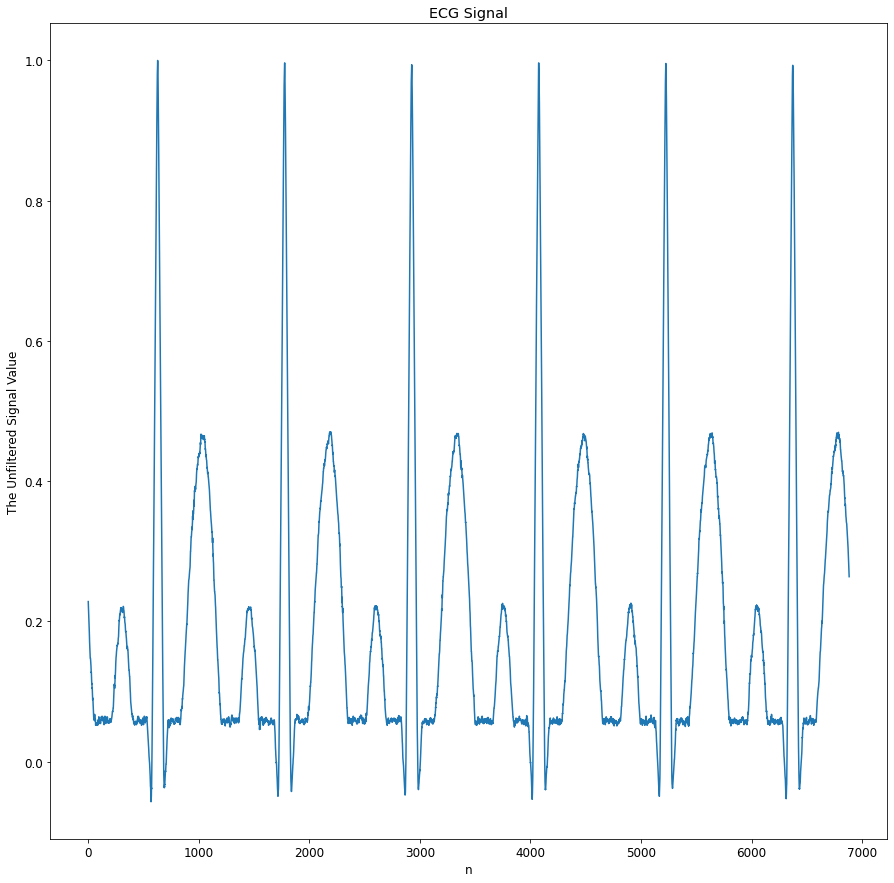

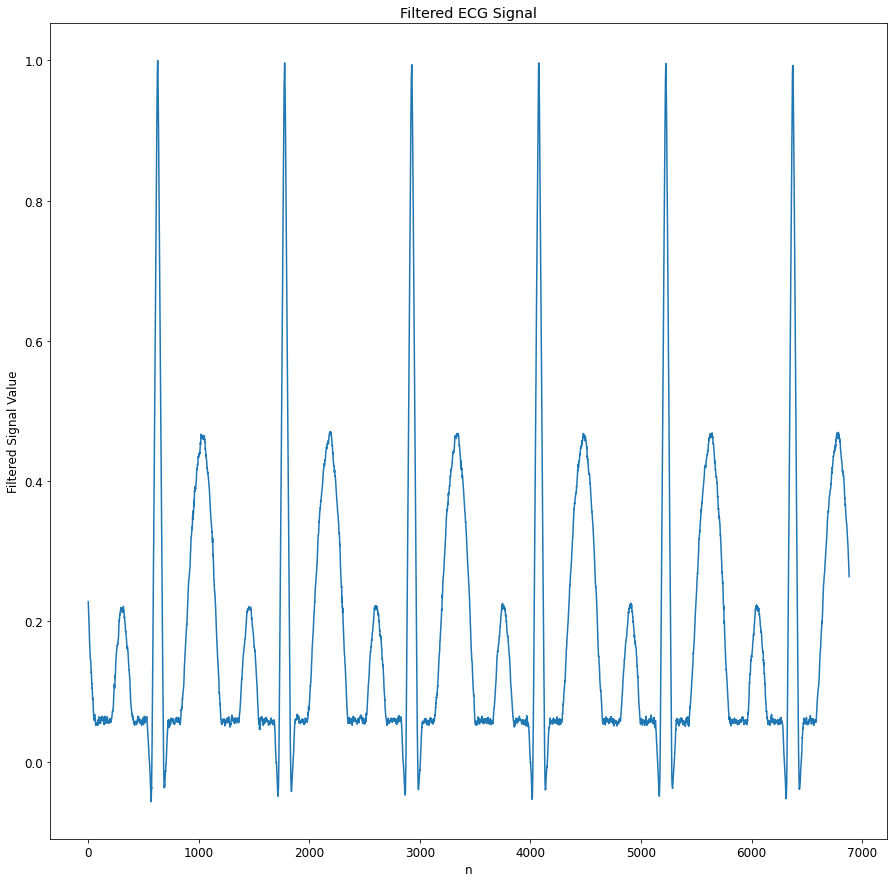

<Figure size 1080x1080 with 0 Axes>

In [47]:
signal = np.loadtxt('ECG_Data.txt')

filtered_signal = sp.lfilter(bd, ad, signal)

plot_sig(signal,'ECG Signal','n','The Unfiltered Signal Value')
plot_sig(filtered_signal,'Filtered ECG Signal','n','Filtered Signal Value')

In [50]:
def plot_sig(fn,sig,name,xlab,ylab):
  plt.plot(fn,signal)
  plt.title(name)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.xlim([0,500])
  plt.figure()

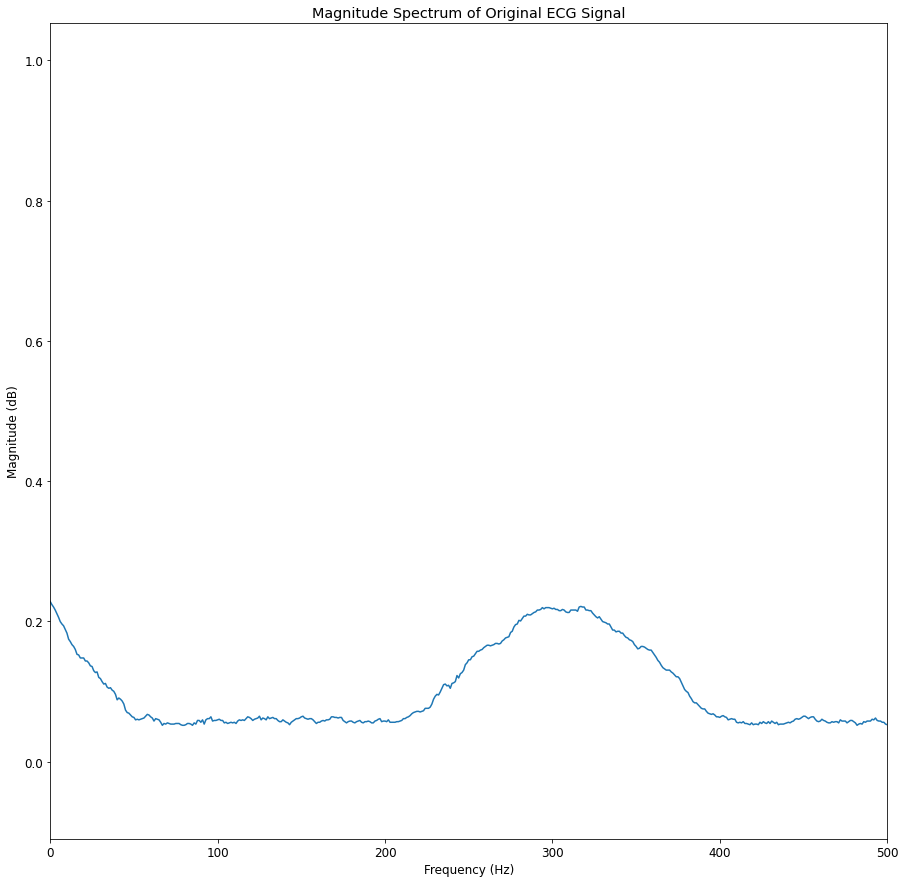

<Figure size 1080x1080 with 0 Axes>

In [51]:
fft_signal = fft(signal)/len(signal)
f = np.arange(len(signal))
plot_sig(f, np.abs(fft_signal),'Magnitude Spectrum of Original ECG Signal','Frequency (Hz)','Magnitude (dB)')



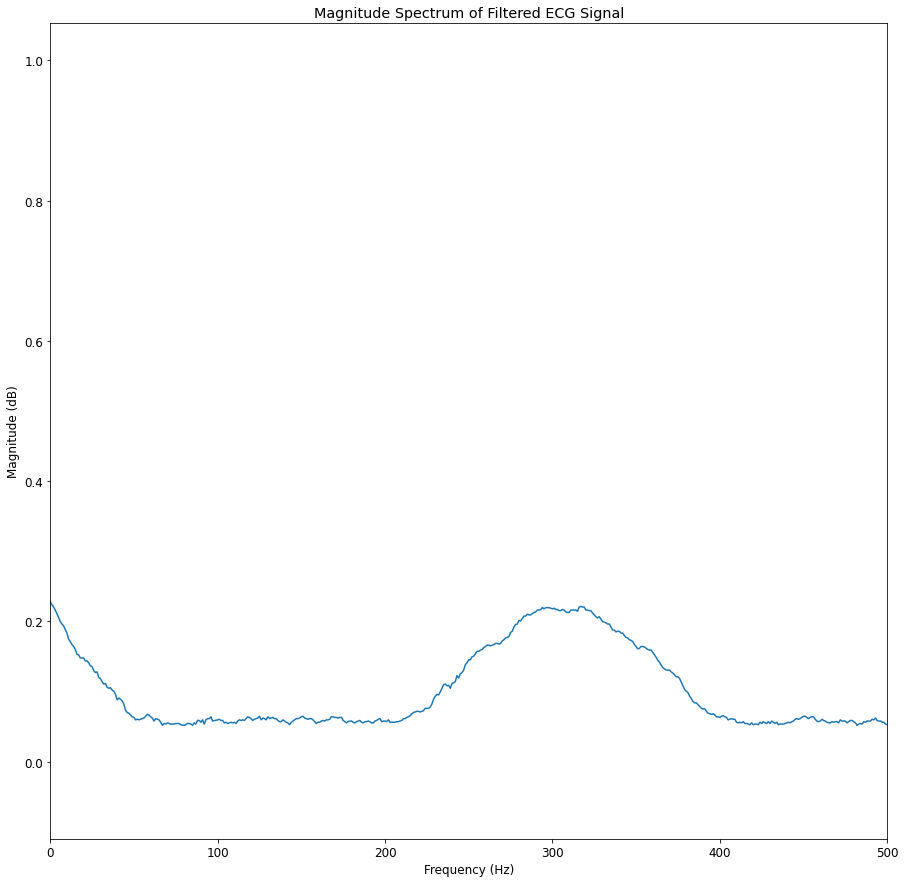

<Figure size 1080x1080 with 0 Axes>

In [53]:
fft_filtered_signal = fft(filtered_signal)/len(filtered_signal)
f = np.arange(len(filtered_signal))
plot_sig(f, np.abs(fft_filtered_signal),'Magnitude Spectrum of Filtered ECG Signal','Frequency (Hz)','Magnitude (dB)')


Problem #3
-------------
----------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


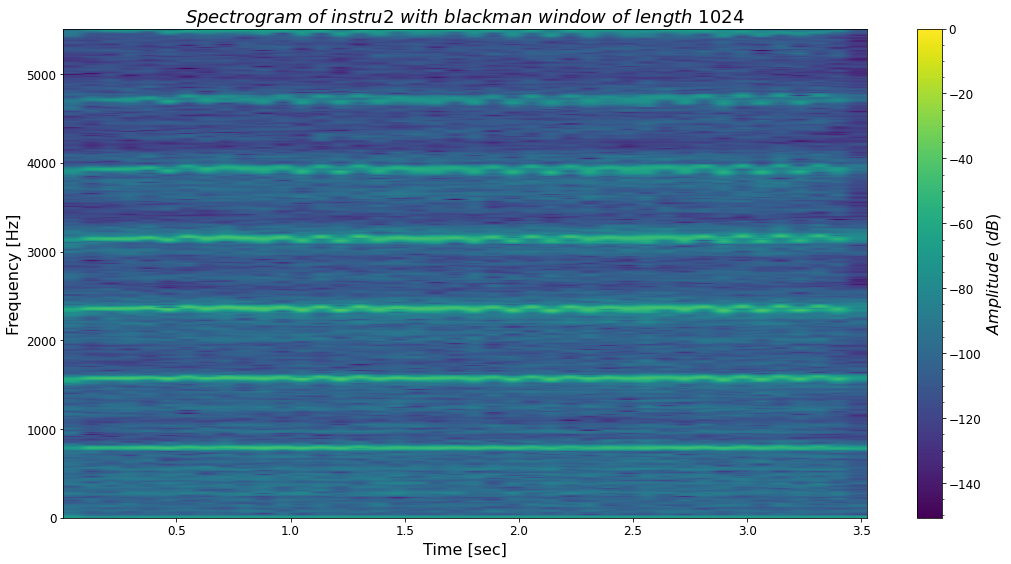

In [54]:
def plot_spectrogram(signal, sample_s, overlap, s_n=None, window=None, length=None):
  # t_f, t_t, t_x = sg.spectrogram(signal, fs=sample_s,
  #                                window=sg.get_window(window, length),
  #                                noverlap=overlap)
  plt.figure(figsize=(18,9))
  spec, freqs, t, im = plt.specgram(signal, NFFT=length,
                                   window=sg.get_window(window, length),
                                   noverlap=overlap,Fs=sample_s,
                                   scale='dB',vmax=0)
  # plt.pcolormesh(t_t, t_f, 20*np.log10(np.abs(t_x)),
  #                shading='gouraud')
  plt.title(r'$Spectrogram\ of\ %s\ with\ %s\ window\ of\ length\ %d$'
            %(s_n if s_n else 'signal', window, length), fontsize = 18)
  plt.ylabel('Frequency [Hz]', fontsize=16)
  plt.xlabel('Time [sec]', fontsize=16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 12)
  plt.show()
fs, signal = wavfile.read('instru%d.wav' %(alpha))
plot_spectrogram(signal/32767.0,fs, overlap=100,
                 s_n='instru%d' %(alpha), window='blackman', length=1024)

Problem #4
--------
----------

In [55]:
fs = 720
pass_f = 10*2*np.pi
stop_f = 20*2*np.pi
T = 1/fs
t = np.arange(0, 1 + (1/fs), 1/fs)
pass_ripple = alpha
max_stop_ann = 40
omega_p = (2/T)*np.tan(pass_f/(2*fs))
omega_s = (2/T)*np.tan(stop_f/(2*fs))
N, Wn = sg.cheb1ord(omega_p, omega_s, pass_ripple, max_stop_ann, analog=True)
print("Order of filter %d" %(N))
print("Cut-off frequency (rad/s) is %f" %(Wn))
b, a  = sg.cheby1(N, pass_ripple, Wn, btype='lowpass', analog=True)
# Create a digital IIR filter from an analog filter and sampling frequency
b_d, a_d = sg.bilinear(b, a, fs=fs)

Order of filter 5
Cut-off frequency (rad/s) is 62.871758


Text(0, 0.5, '$Im\\{z\\}$')

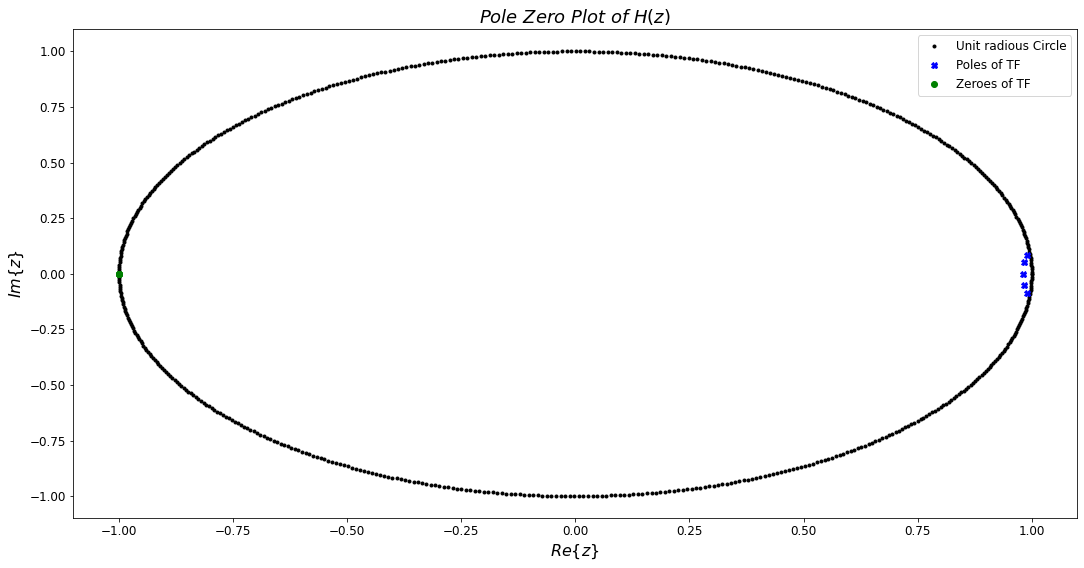

In [59]:
plt.rcParams.update({
    "figure.figsize": (15,15),
    "font.size": 12})
zeroes, poles, _ = sg.tf2zpk(b_d, a_d)

cir = np.arange(0, 2*np.pi, 0.01)

plt.figure(figsize=(18,9))
plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit radious Circle')
plt.plot(np.real(poles), np.imag(poles), 'bX', label='Poles of TF')
plt.plot(np.real(zeroes), np.imag(zeroes), 'go', label='Zeroes of TF')
plt.legend()
plt.title(r'$Pole\ Zero\ Plot\ of\ H(z)$', fontsize = 18)

plt.xlabel(r'$Re\{z\}$', fontsize=16)
plt.ylabel(r'$Im\{z\}$', fontsize=16)

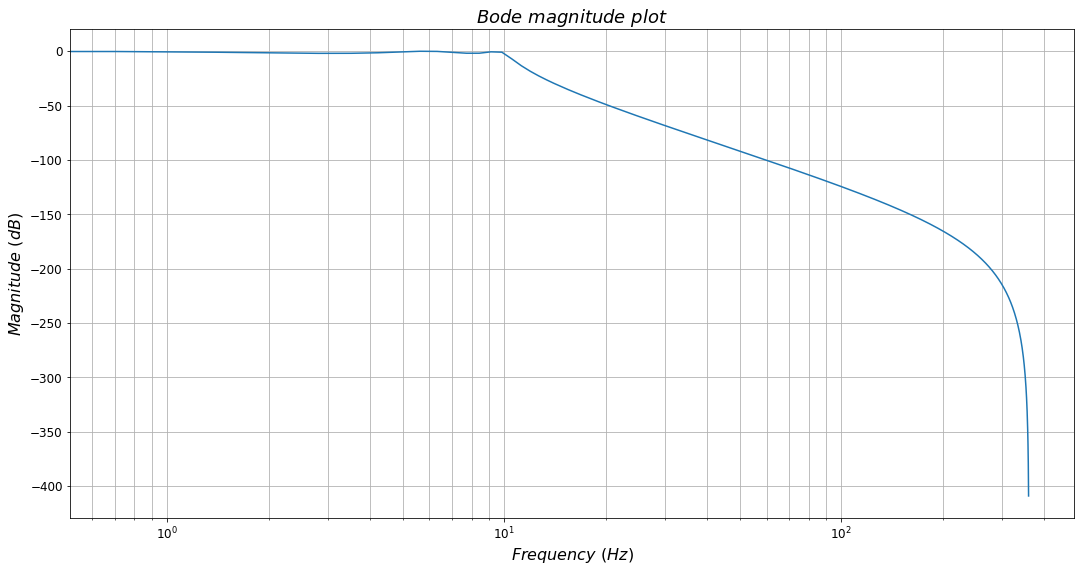

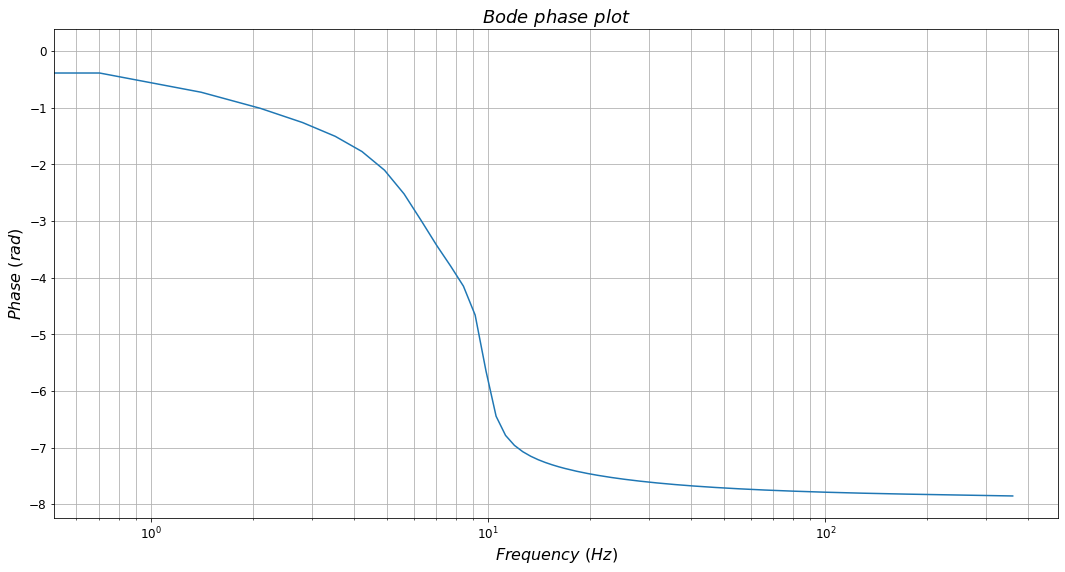

In [60]:
w, H = sg.freqz(b_d, a_d, 512)

plt.figure(figsize=(18,9))
plt.semilogx(w*(fs/(2*np.pi)), 20*np.log10(np.abs(H)))
plt.title(r'$Bode\ magnitude\ plot$',fontsize=18)
plt.xlabel(r'$Frequency\ (Hz)$', fontsize=16)
plt.ylabel(r'$Magnitude\ (dB)$', fontsize=16)
plt.grid(True, which='both')

plt.figure(figsize=(18,9))
plt.semilogx(w*(fs/(2*np.pi)), np.unwrap(np.angle(H)))
plt.title(r'$Bode\ phase\ plot$',fontsize=18)
plt.xlabel(r'$Frequency\ (Hz)$', fontsize=16)
plt.ylabel(r'$Phase\ (rad)$', fontsize=16)
plt.grid(True, which='both', ls='-')

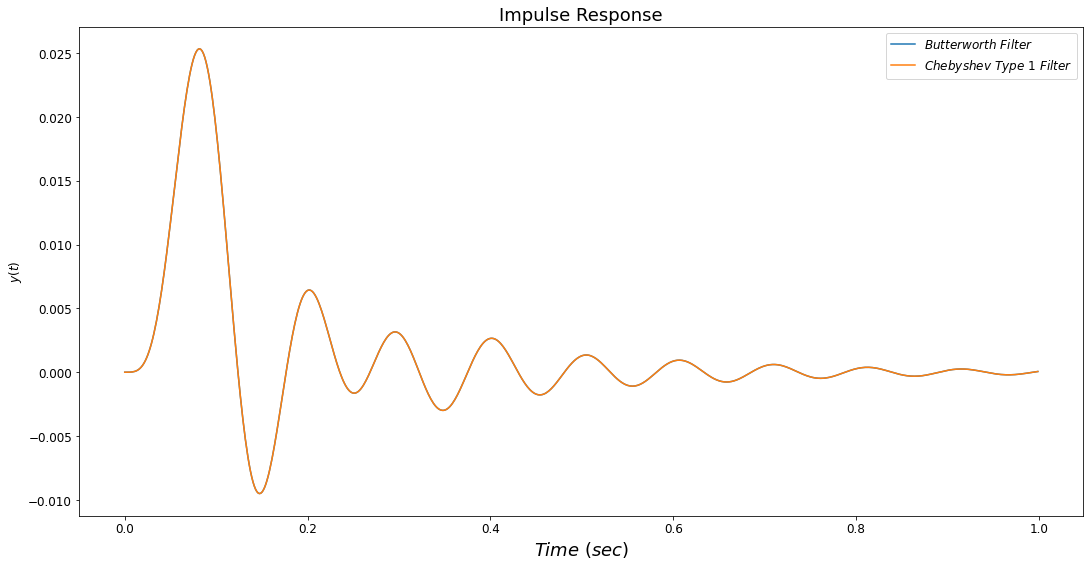

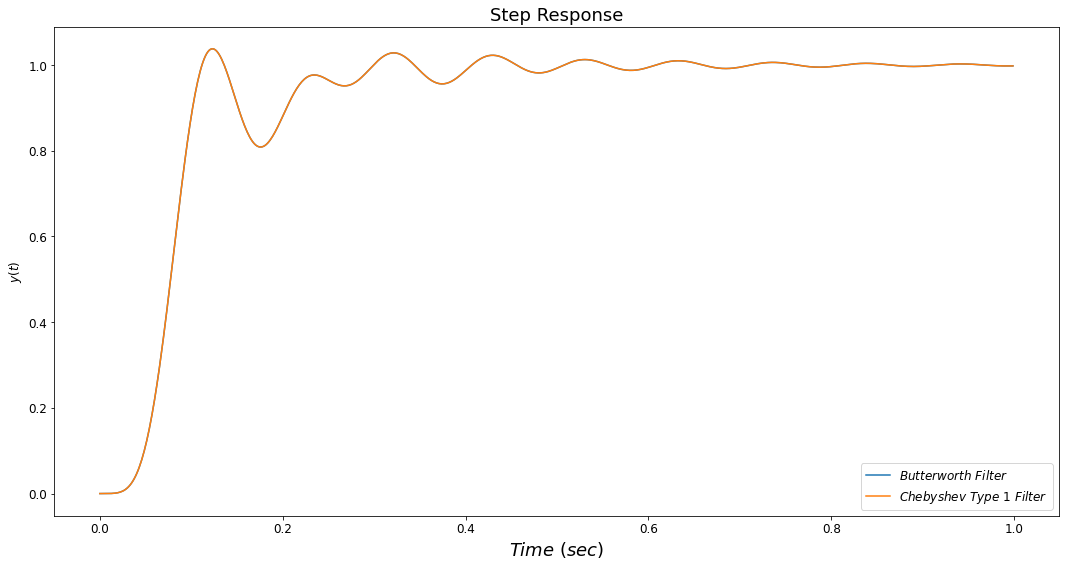

In [61]:
t = np.arange(0, 1, 1/fs)

plt.figure(figsize=(18,9))
imp_res = sg.lfilter(b_d, a_d, sg.unit_impulse(720))
plt.plot(t, imp_res, label=r'$Butterworth\ Filter$')
plt.plot(t , imp_res, label=r'$Chebyshev\ Type\ 1\ Filter$')
plt.title('Impulse Response',fontsize=18)
plt.xlabel(r'$Time\ (sec)$',fontsize=18)
plt.ylabel(r'$y(t)$')
plt.legend()

plt.figure(figsize=(18,9))
step_res = sg.lfilter(b_d, a_d, np.heaviside(t, 1))
plt.plot(t, step_res, label=r'$Butterworth\ Filter$')
plt.plot(t ,step_res, label=r'$Chebyshev\ Type\ 1\ Filter$')
plt.title('Step Response',fontsize=18)
plt.xlabel(r'$Time\ (sec)$',fontsize=18)
plt.ylabel(r'$y(t)$')
plt.legend()